##Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
import pickle

In [ ]:
dataset = pd.read_csv('/content/survey lung cancer.csv')
dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


###Data preprocessing

In [ ]:
dataset.shape

(309, 16)

In [ ]:
dataset.isnull().values.any()

False

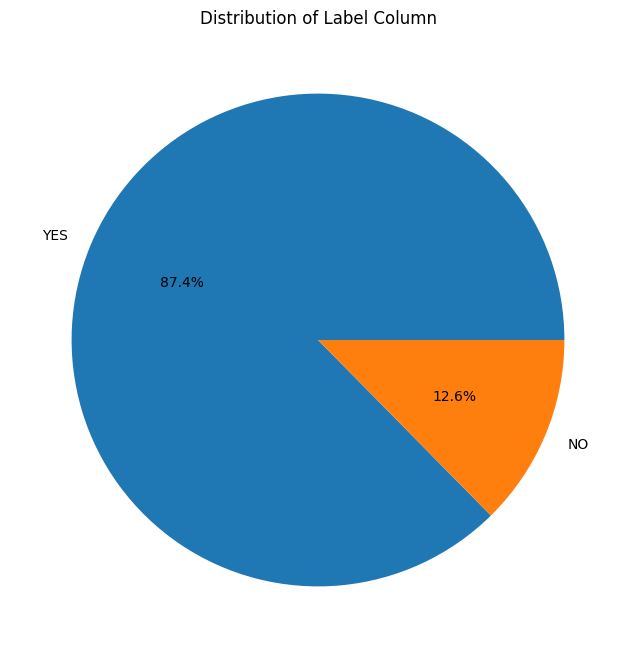

In [ ]:
label_counts = dataset['LUNG_CANCER'].value_counts()
plt.figure(figsize=(8, 8))
label_counts.plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Label Column')
plt.ylabel('')
plt.show()

###one hot encoding

In [ ]:
df = pd.DataFrame(dataset)

# One-hot encoding using pandas
dataset2 = pd.get_dummies(df, columns=['GENDER', 'LUNG_CANCER'])

print(dataset2)

     AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  CHRONIC DISEASE  \
0     69        1               2        2              1                1   
1     74        2               1        1              1                2   
2     59        1               1        1              2                1   
3     63        2               2        2              1                1   
4     63        1               2        1              1                1   
..   ...      ...             ...      ...            ...              ...   
304   56        1               1        1              2                2   
305   70        2               1        1              1                1   
306   58        2               1        1              1                1   
307   67        2               1        2              1                1   
308   62        1               1        1              2                1   

     FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING 

###Split the Data into Training and Testing Sets

In [ ]:
X = dataset2.drop(columns=['LUNG_CANCER_YES'])
y = dataset2['LUNG_CANCER_YES']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Standarized the data

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **KNN classifier**

KNN Accuracy: 1.0
KNN Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00         2
        True       1.00      1.00      1.00        60

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



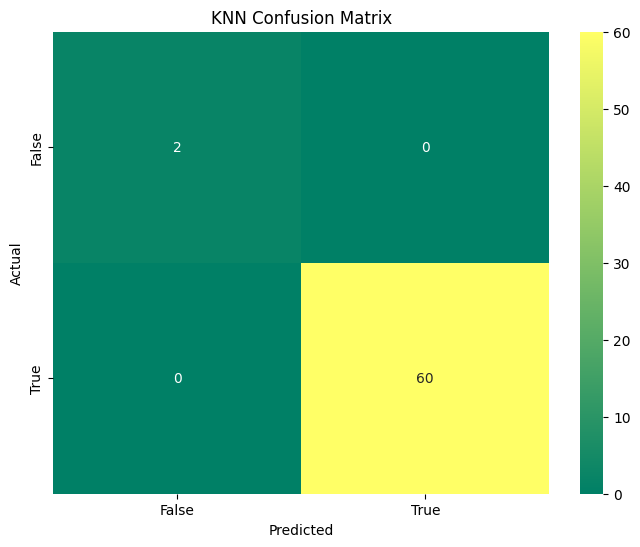

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_knn_pred = knn.predict(X_test_scaled)

# KNN Results
accuracy_knn = accuracy_score(y_test, y_knn_pred)
report_knn = classification_report(y_test, y_knn_pred, output_dict=True)
cm_knn = confusion_matrix(y_test, y_knn_pred)

print(f"KNN Accuracy: {accuracy_knn}")
print("KNN Classification Report:")
print(classification_report(y_test, y_knn_pred))

# Plot KNN Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='summer', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.show()


## **K-Means Clustering**

K-Means Accuracy: 0.967741935483871
K-Means Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.00      0.00         2
        True       0.97      1.00      0.98        60

    accuracy                           0.97        62
   macro avg       0.98      0.50      0.49        62
weighted avg       0.97      0.97      0.95        62



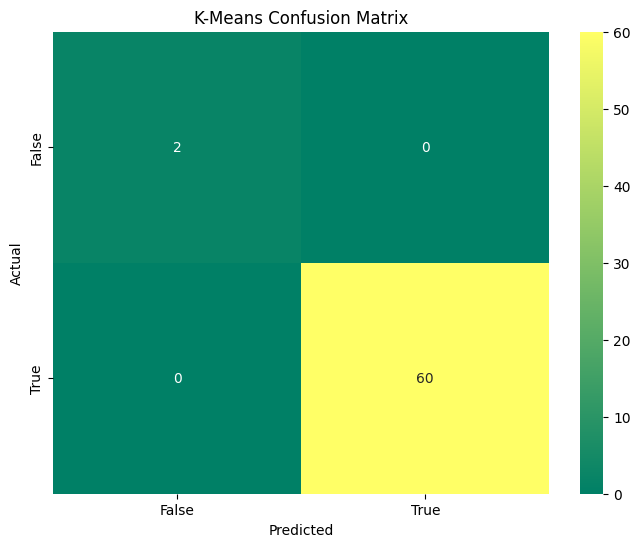

In [ ]:
kmeans = KMeans(n_clusters=len(np.unique(y)), random_state=42, n_init=10)
kmeans.fit(X_train_scaled)
y_kmeans_pred = kmeans.predict(X_test_scaled)

# Map K-Means labels to the original labels
mapping = {}
for i in range(len(np.unique(kmeans.labels_))):
    mask = (kmeans.labels_ == i)
    if len(np.bincount(y_train[mask])) > 0:
        mapping[i] = np.bincount(y_train[mask]).argmax()
y_kmeans_mapped = np.array([mapping[label] for label in y_kmeans_pred])

# K-Means Results
accuracy_kmeans = accuracy_score(y_test, y_kmeans_mapped)
report_kmeans = classification_report(y_test, y_kmeans_mapped, output_dict=True, zero_division=1)
cm_kmeans = confusion_matrix(y_test, y_kmeans_mapped)

print(f"K-Means Accuracy: {accuracy_kmeans}")
print("K-Means Classification Report:")
print(classification_report(y_test, y_kmeans_mapped, zero_division=1))

# Plot K-Means Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='summer', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('K-Means Confusion Matrix')
plt.show()

# **Naive Bayes Classifier**

Naive Bayes Accuracy: 1.0
Naive Bayes Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00         2
        True       1.00      1.00      1.00        60

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



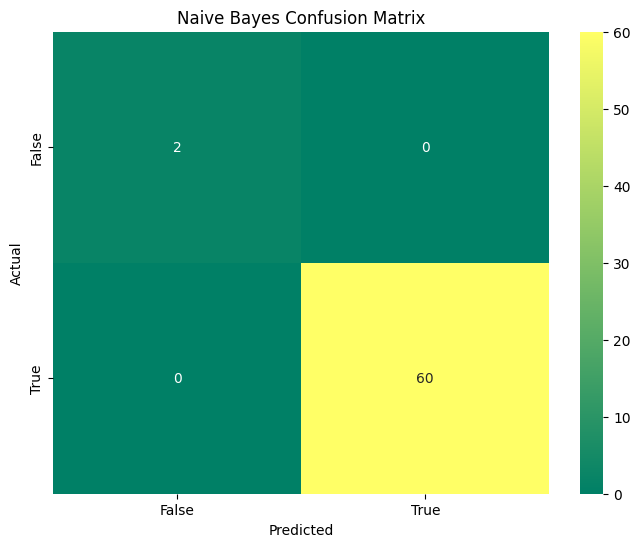

In [ ]:
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_nb_pred = nb.predict(X_test_scaled)

# Naive Bayes Results
accuracy_nb = accuracy_score(y_test, y_nb_pred)
report_nb = classification_report(y_test, y_nb_pred, output_dict=True)
cm_nb = confusion_matrix(y_test, y_nb_pred)

print(f"Naive Bayes Accuracy: {accuracy_nb}")
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_nb_pred))

# Plot Naive Bayes Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='summer', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

# **Decision Tree**

Decision Tree Accuracy: 1.0
Decision Tree Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00         2
        True       1.00      1.00      1.00        60

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



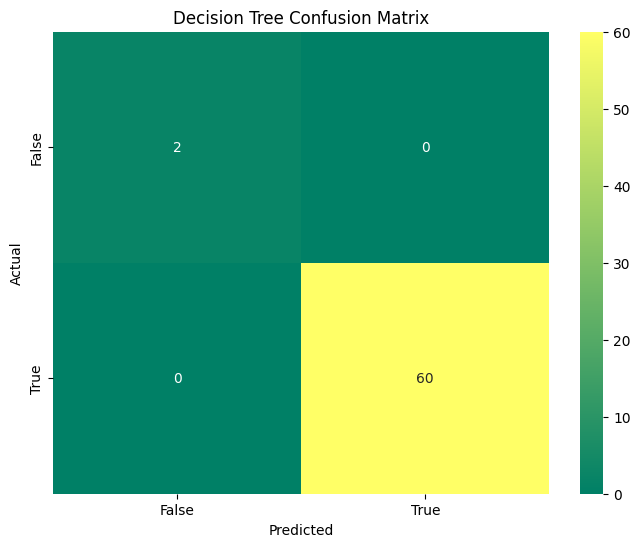

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_dt_pred = dt.predict(X_test_scaled)

# Decision Tree Results
accuracy_dt = accuracy_score(y_test, y_dt_pred)
report_dt = classification_report(y_test, y_dt_pred, output_dict=True)
cm_dt = confusion_matrix(y_test, y_dt_pred)

print(f"Decision Tree Accuracy: {accuracy_dt}")
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_dt_pred))

# Plot Decision Tree Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='summer', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()